In [1]:
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from tqdm import tqdm_notebook as tqdm
from matplotlib.collections import LineCollection

In [235]:
FIGSIZE = (4,2)
_range = 1.4
dpi=720
def plot_images(period=3,
                e=0,
                showcomponents=True,
                showpol=False,
                polangle=-45,
                fps=60,
                cycles=1,
                withconnections=True,
                ihat=None,
                jhat=None,
                showsum=True,
                shift_phase=0,
                xoffsets=np.array([0,0])):
    ihat = ihat if ihat is not None else np.array([1, 0])
    jhat = jhat if jhat is not None else  np.array([0, 1])
    nframes = int(fps * period * cycles)
    
    if isinstance(polangle, int):
        polangles = np.linspace(polangle, polangle, nframes)
    else:
        polangles = np.linspace(*polangle, nframes)
    phat = np.array([np.sin(np.deg2rad(polangles[0])), np.cos(np.deg2rad(polangles[0]))])
    origin = xoffsets
    frequency = 2 * np.pi / (fps * period)
    
    gray = (0,0,0,0.6)
    U = None
    V = None
    def animate(i):
        global U
        global V
        U = ihat * np.sin(frequency * i)
        V = jhat * np.sin(frequency * i + e + (shift_phase * i/nframes))
        
        sumvec = U + V
        if showsum:
            q2.set_UVC(*sumvec)
        if showcomponents:
            q.set_UVC(U, V)
            if withconnections:
                lines = [[U, sumvec], [V, sumvec]]
                ls.set_paths(lines)
            
        if showpol:
            phat = np.array([np.sin(np.deg2rad(polangles[i])), np.cos(np.deg2rad(polangles[i]))])
            polvec = sumvec @ phat * phat
            qpol.set_UVC(*polvec)
            if withconnections:
                pol_connect.set_paths([[polvec, sumvec],])
                _pl = phat * _range
                analyzer.set_paths([[_pl, -_pl]])
            
        
        return (q2,)

    fig = plt.figure(figsize=FIGSIZE, dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], label='ax1')
    
    if showsum:
        q2 = ax.quiver(0, 0, ihat[0], jhat[1], angles='xy', scale_units='xy', scale=1, color='b')
    
    if showcomponents:
        q = ax.quiver(origin, [0,0], ihat, jhat, angles='xy', scale_units='xy', scale=1, color=[gray,gray, 'b'])
        if withconnections:
            lines = [[(ihat[0], 0), (ihat[0], jhat[1])], [(0, jhat[1]), (ihat[0], jhat[1])]]
            ls = LineCollection(lines, linewidths=(0.5, 0.5),colors=(0,0,0,.2), linestyle='dashed')
            ax.add_collection(ls)

    if showpol:
        qpol = ax.quiver(0, 0, phat[0], phat[1], angles='xy', scale_units='xy', scale=1, color=(0,1,0,0.8))
        if withconnections:
            _pl = phat * _range
            analyzer = LineCollection([[(_pl[0], _pl[1]), (-_pl[0], -_pl[1])]],
                                      linewidths=(0.5, 0.5),colors=(0,1,0,0.3), linestyle='dashed')
            ax.add_collection(analyzer)
            pol_connect = LineCollection([],
                                      linewidths=(0.5, 0.5),colors=(0,1,0,0.3), linestyle='dashed')
            ax.add_collection(pol_connect)


    ax.set_xlim([1.5 * -_range, 1.5 * _range])
    ax.set_ylim([-_range, _range])
    ax.set_aspect('equal')
    ax.axis('off')
    anim = animation.FuncAnimation(fig, animate, frames=tqdm(range(nframes)),
                                   interval=1000/fps, blit=True)
    return anim, (U, V)

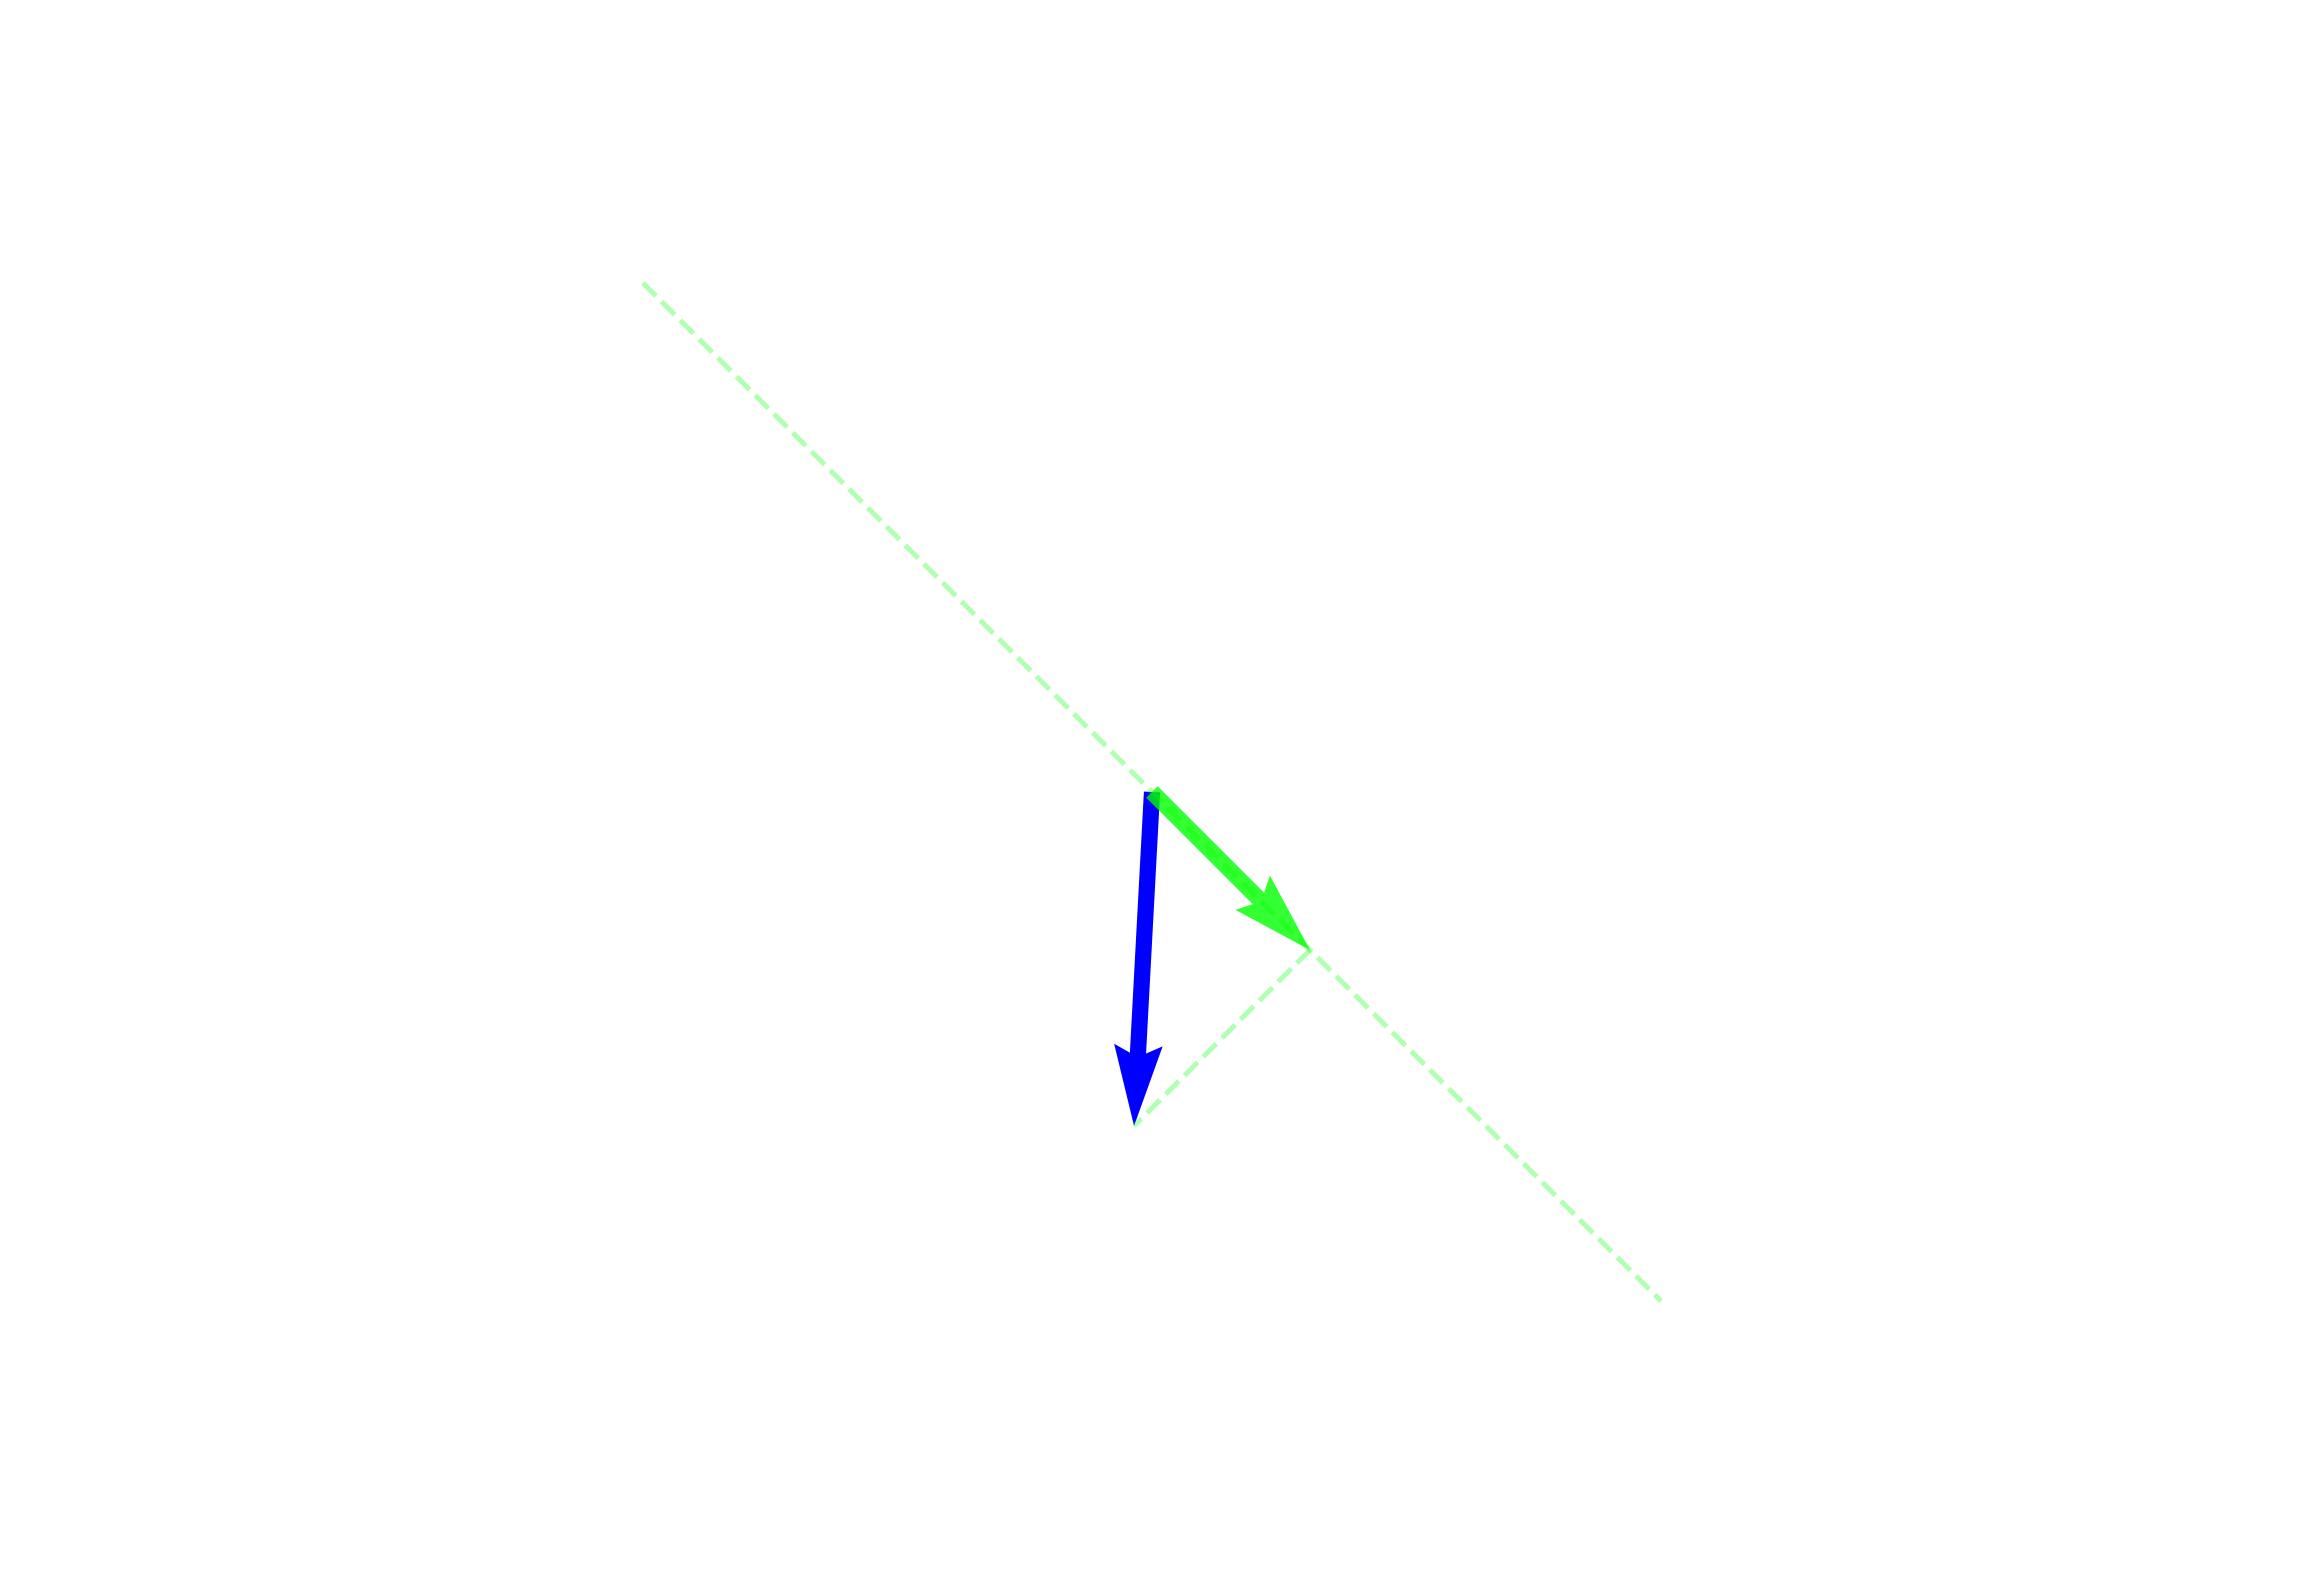

In [236]:
q = np.sin(np.deg2rad(-45)) / np.sqrt(2)

anim, (U, V) = plot_images(e=-2.4,
                           showcomponents=False,
                           showpol=True,
                           polangle=-45,
#                            cycles=1,
                           withconnections=True,
                           fps=60,
#                            shift_phase=0,
#                          xoffsets=np.array([1, -1]),
#                          ihat = np.array([-q, q]),
#                          jhat = np.array([q, q]),
                           )
# HTML(anim.to_html5_video())
anim.save("/Users/talley/Desktop/dic_015.mp4")

In [412]:

def moving_components(period=3,
                      e=0,
                      showcomponents=True,
                      showpol=False,
                      polangle=-45,
                      fps=60,
                      cycles=1,
                      withconnections=True,
                      direction=1,
                      ihat=None,
                      jhat=None):
    ihat = ihat if ihat is not None else np.array([1, 0])
    jhat = jhat if jhat is not None else  np.array([0, 1])

    phat = np.array([np.sin(np.deg2rad(polangle)), np.cos(np.deg2rad(polangle))])
    origin = np.zeros_like(ihat)
    frequency = 2 * np.pi / (fps * period)
        
    gray = (0,0,0,0.6)
    U = None
    V = None
    nframes = int(fps * period * cycles)
    def animate(i):
        global U
        global V
        ax.clear()
        U = ihat * np.sin(frequency * i)
        V = jhat * np.sin(frequency * i + e)
        
        sumvec = U + V
#         q2 = ax.quiver(0, 0, *sumvec, angles='xy', scale_units='xy', scale=1, color='b')
        
        if showcomponents:
            # this will move the component vectors out to +/-1 over the course of the movie
            org = [i/nframes, -i/nframes]
            if direction == -1:
                org = [1 - i/nframes, -1 + i/nframes]
    
            q = ax.quiver(org, 0, U, V, angles='xy', scale_units='xy', scale=1, color=[gray,gray])
            if withconnections:
                lines = [[U, sumvec], [V, sumvec]]
                ls = LineCollection(lines, linewidths=(0.5, 0.5),colors=(0,0,0,.2), linestyle='dashed')
                ax.add_collection(ls)
            
        if showpol:
            polvec = sumvec @ phat * phat
            qpol = ax.quiver(0, 0, *polvec, angles='xy', scale_units='xy', scale=1, color=(0,1,0,0.8))
            if withconnections:
                pol_connect.set_paths([[polvec, sumvec],])
                
        ax.set_xlim([1.5 * -_range, 1.5 * _range])
        ax.set_ylim([-_range, _range])
        ax.set_aspect('equal')
        ax.axis('off')
        return (q,)

    fig = plt.figure(figsize=FIGSIZE, dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], label='ax1')
    
#     q2 = ax.quiver(0, 0, ihat[0], jhat[1], angles='xy', scale_units='xy', scale=1, color='b')
    
    if showcomponents:
        q = ax.quiver(origin, origin, ihat, jhat, angles='xy', scale_units='xy', scale=1, color=[gray,gray, 'b'])
        if withconnections:
            lines = [[(ihat[0], 0), (ihat[0], jhat[1])], [(0, jhat[1]), (ihat[0], jhat[1])]]
            ls = LineCollection(lines, linewidths=(0.5, 0.5),colors=(0,0,0,.2), linestyle='dashed')
            ax.add_collection(ls)

    if showpol:
        qpol = ax.quiver(0, 0, phat[0], phat[1], angles='xy', scale_units='xy', scale=1, color=(0,1,0,0.8))
        if withconnections:
            _pl = phat * _range
            analyzer = LineCollection([[(_pl[0], _pl[1]), (-_pl[0], -_pl[1])]],
                                      linewidths=(0.5, 0.5),colors=(0,1,0,0.3), linestyle='dashed')
            ax.add_collection(analyzer)
            pol_connect = LineCollection([],
                                      linewidths=(0.5, 0.5),colors=(0,1,0,0.3), linestyle='dashed')
            ax.add_collection(pol_connect)


    ax.set_xlim([1.5 * -_range, 1.5 * _range])
    ax.set_ylim([-_range, _range])
    ax.set_aspect('equal')
    ax.axis('off')
    anim = animation.FuncAnimation(fig, animate, frames=tqdm(range(nframes)),
                                   interval=1000/fps, blit=True)
    return anim, (U, V)

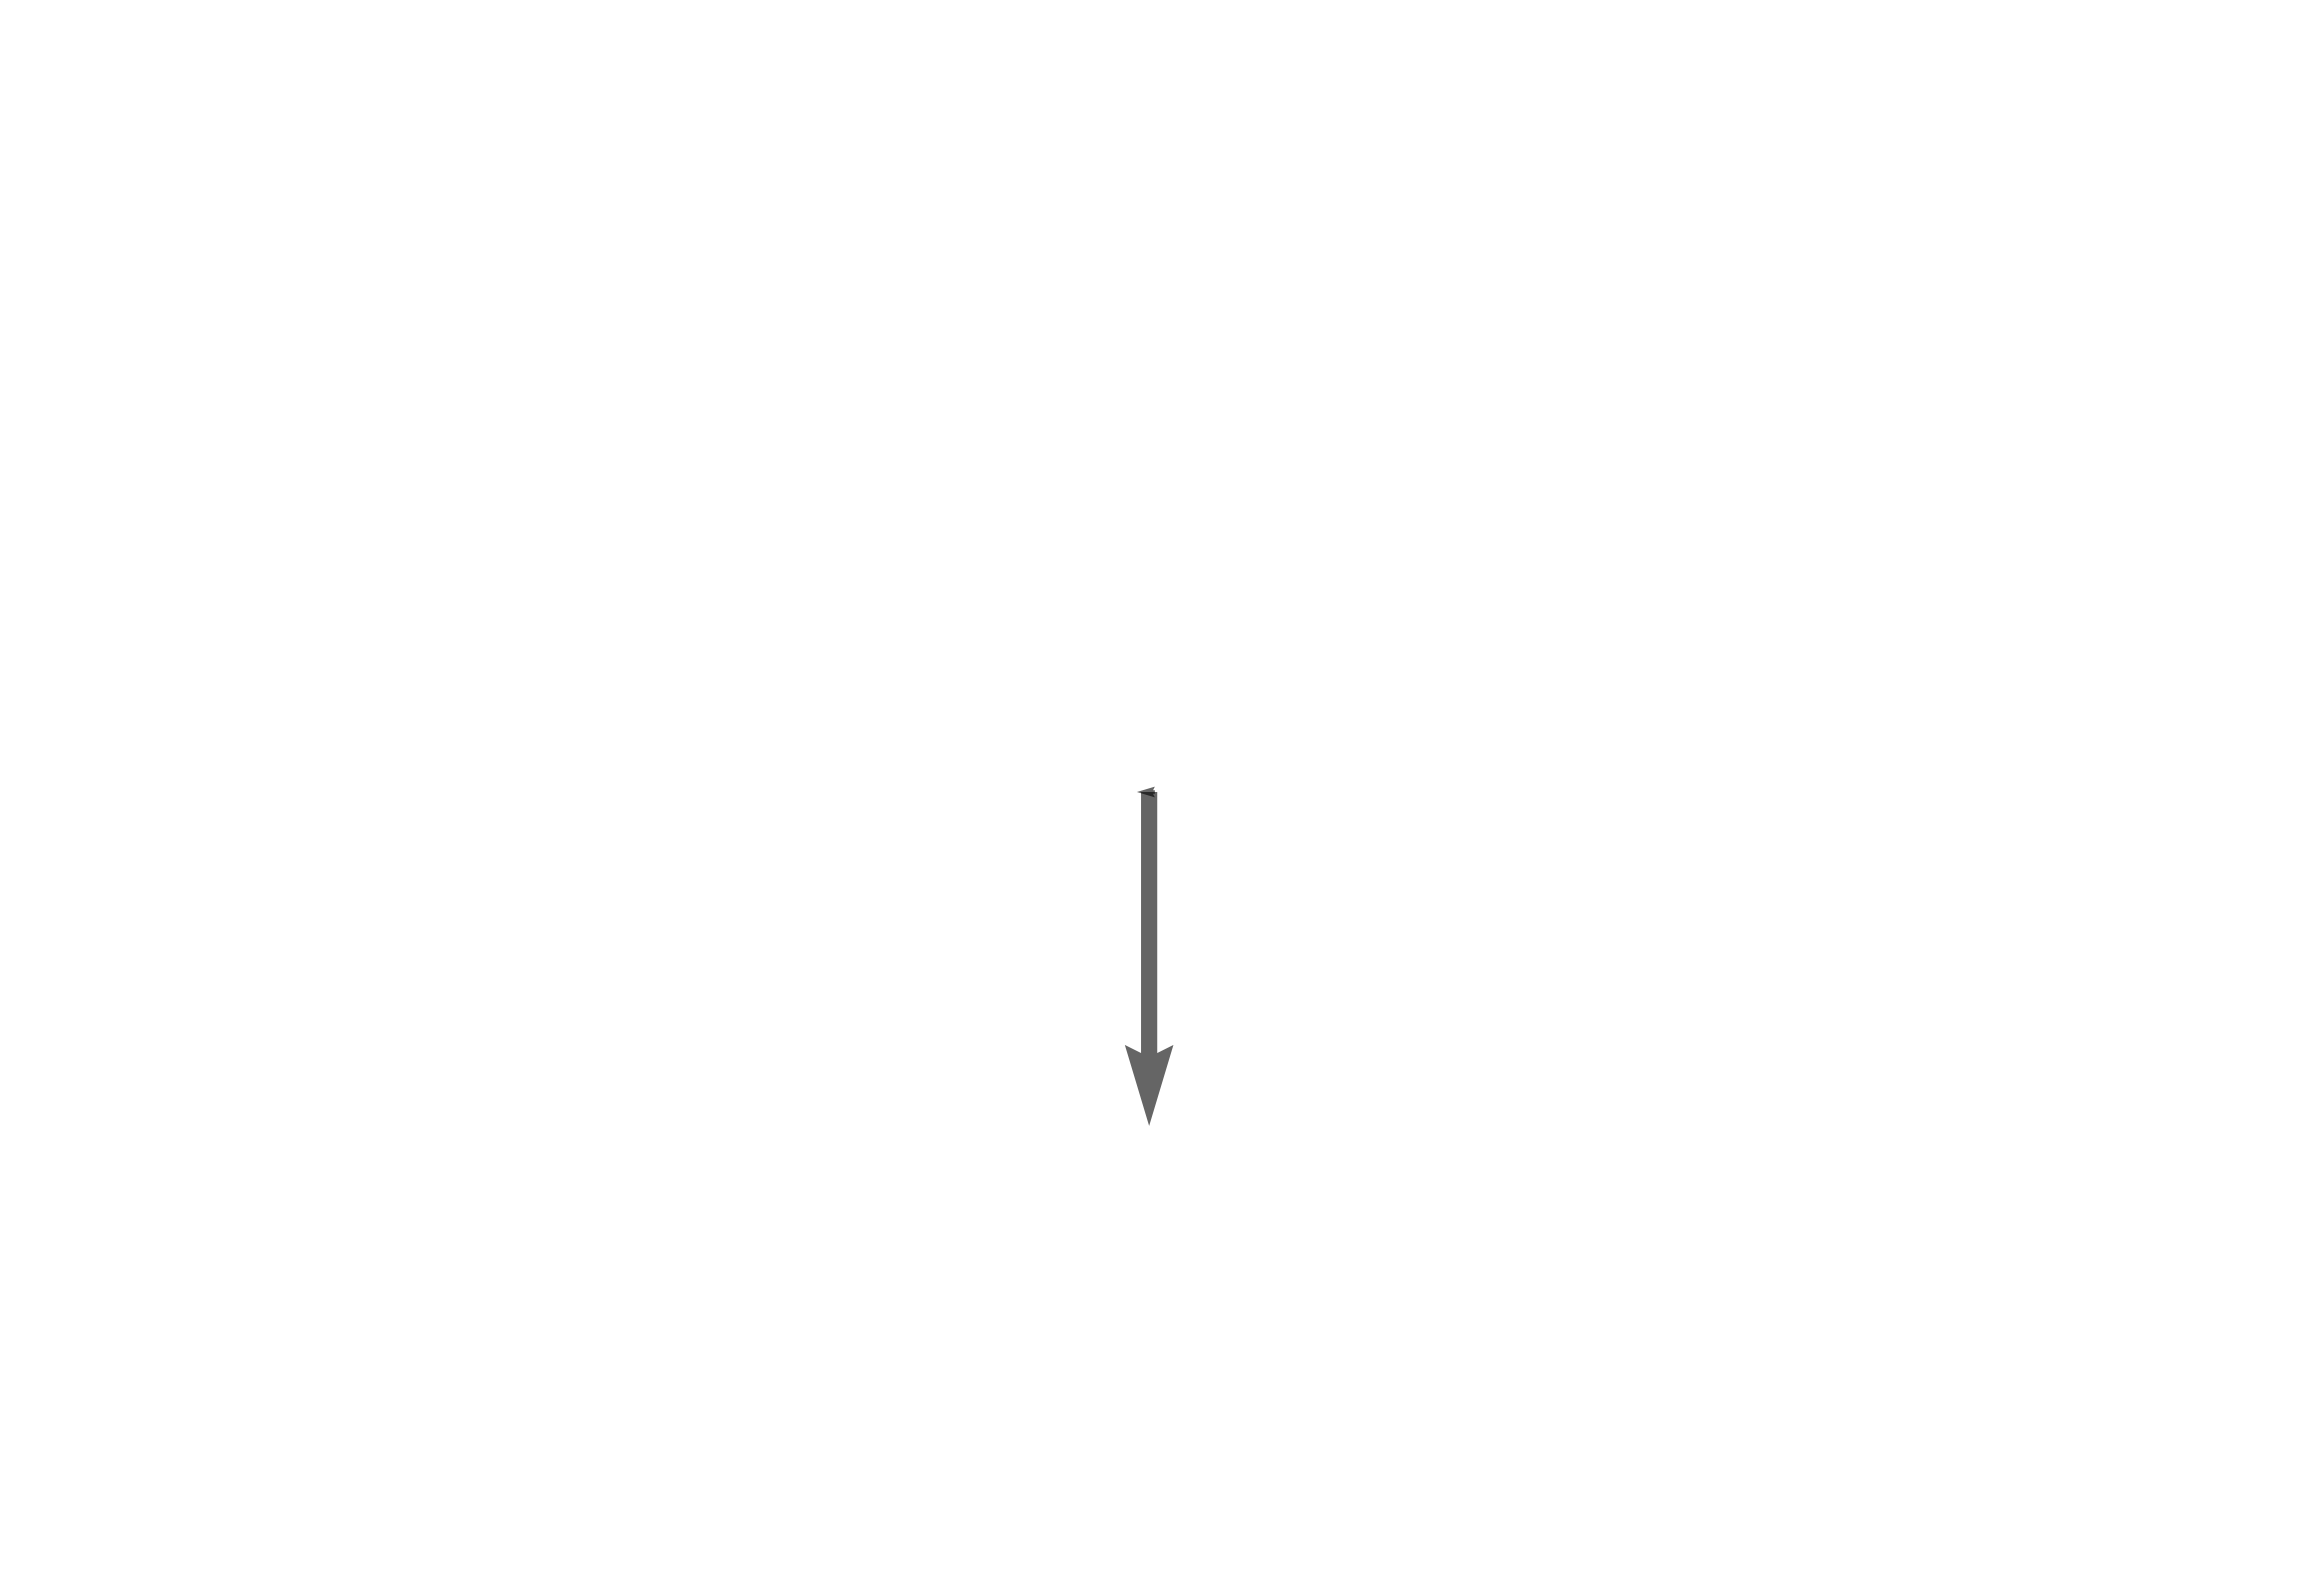

In [445]:
anim, (U, V) = moving_components(e=-2.4,
                           showcomponents=True,
                           showpol=False,
#                            polangle=-45,
                           cycles=1,
                           withconnections=False,
                           fps=60,
                           direction=-1,
#                            ihat = np.array([-q, q]),
#                            jhat = np.array([q, q])
                                )
HTML(anim.to_html5_video())
anim.save("/Users/talley/Desktop/dic_010.mp4")

## 

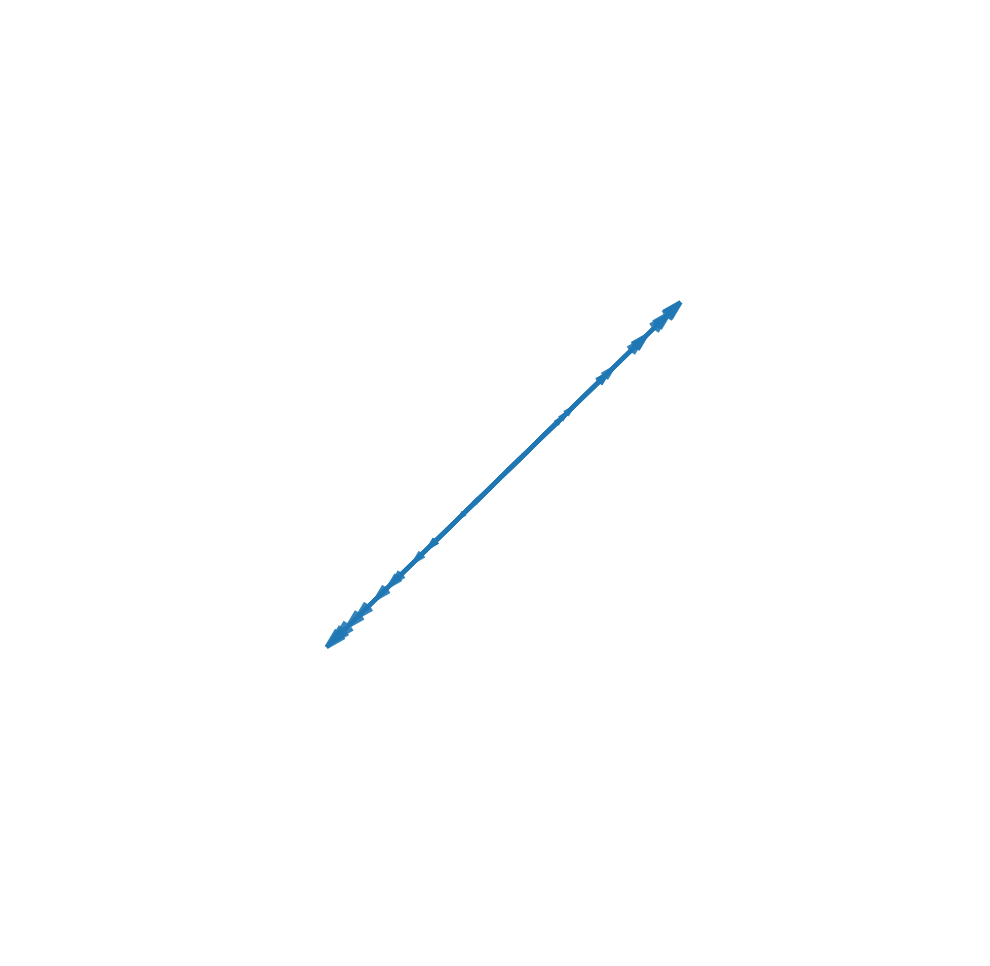

In [212]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

FIGSIZE = (4,2)
_range = 1.4
dpi=720
def make_anim(period=0.8, cycles=1, fps=20, start_phase=0, numarrows=30,
             elev=(30, 0), az=(-60, -90), showframe=True, pol=(0, 0)):
    nframes = int(fps * period * cycles * 2 * np.pi)
    pols = np.deg2rad(np.linspace(*pol, nframes))
    frequency = 1 / (period)
    _range=(-np.pi, np.pi)
    
    z = np.linspace(*_range,numarrows)
    zer = np.zeros_like(z)
    hl = .08
    l=0.8
    lw=1
    def plot_emwave(i):
        ax.clear()
        pol = pols[i]

        sinz=np.sin(frequency*z + 2 * np.pi * i/nframes + start_phase)
        A = sinz * np.sin(pol)
        B = sinz * np.cos(pol)
        q = ax.quiver(zer,z,zer,B,zer,A,arrow_length_ratio=hl, alpha=0.9, length=l, lw=lw)
#         q2 = ax.quiver(zer,z,zer,A,zer,-B, color='r', alpha=0.1, arrow_length_ratio=hl, length=l, lw=lw)
        
        if not showframe:
            ax.set_axis_off()
        ax.set_xlim3d(-l,l)
        ax.set_ylim3d(*_range)
        ax.set_zlim3d(-l,l)
        ax.margins(0)
        ax.view_init(elev[0] - (-np.diff(elev)[0] * i / nframes),
                     az[0] - (-np.diff(az)[0] * i / nframes))
        ax.tick_params(grid_linewidth=0.1, grid_color='white', labelcolor='white')
        # make the grid lines transparent
        ax.xaxis._axinfo["grid"]['color'] =  (0,0,0,.05)
        ax.yaxis._axinfo["grid"]['color'] =  (0,0,0,.05)
        ax.zaxis._axinfo["grid"]['color'] =  (0,0,0,.05)
        ax.xaxis._axinfo["tick"]['color'] =  (0,0,0,.2)
        ax.yaxis._axinfo["tick"]['color'] =  (0,0,0,.2)
        ax.zaxis._axinfo["tick"]['color'] =  (0,0,0,.2)
        ax.xaxis._axinfo["axisline"]['color'] =  (0,0,0,.2)
        ax.yaxis._axinfo["axisline"]['color'] =  (0,0,0,.2)
        ax.zaxis._axinfo["axisline"]['color'] =  (0,0,0,.2)
        return(q, )

    fig = plt.figure(figsize=(4,4),dpi=300)
    ax = fig.gca(projection='3d')
    if not showframe:
        ax.set_axis_off()
    sinz=np.sin(z + start_phase)
    q = ax.quiver(zer,z,zer,zer,zer,sinz,arrow_length_ratio=hl, alpha=0.9, length=l, lw=lw)
#     q2 = ax.quiver(zer,z,zer,sinz,zer,zer, color='r', alpha=0.1, arrow_length_ratio=hl, length=l, lw=lw)
    anim = animation.FuncAnimation(fig, plot_emwave, frames=tqdm(range(nframes)),
                                   interval=1000/fps, blit=True)
    return anim

anim = make_anim(fps=30, showframe=False, elev=(0, 0), az=(-90, -90), pol=(45, 45))
HTML(anim.to_html5_video())
anim.save("/Users/talley/Desktop/waves_008.mp4")